In [17]:
import matplotlib.pyplot as plt
import numpy as np
from plot_decision_regions import plot_decision_regions

plt.rc('figure', figsize=(10, 7))

In [2]:
def gini(p):
    return (p) * (1 - (p)) + (1 - p) * (1 - (1 - p))
def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

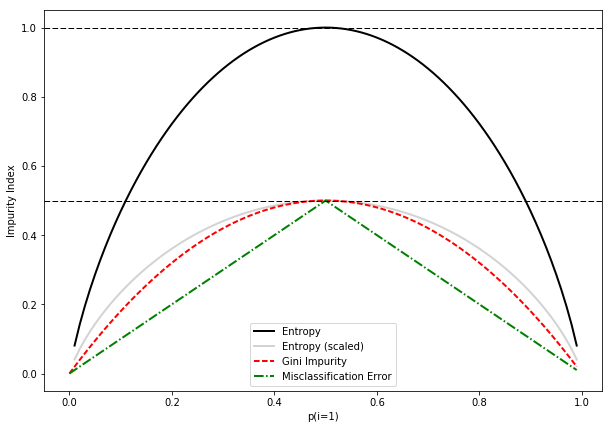

In [14]:
# plotting different impurity measures
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green']):
    line = ax.plot(x, i, label = lab, linestyle = ls, lw = 2, color = c)
ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
ax.axhline(y = 1.0, linewidth = 1, color = 'k', linestyle = '--')
ax.legend(loc = 'best')
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [15]:
# import Iris dataset and split it to the trainig and test sets
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Accuracy of decision tree: 0.98


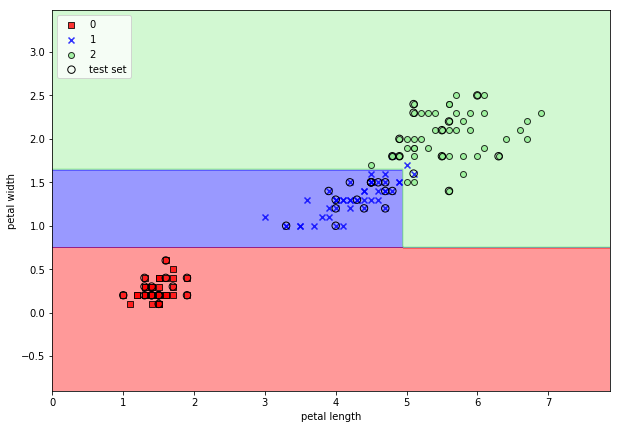

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
tree.fit(X_train, y_train)

# predict test data
y_pred = tree.predict(X_test)
print('Accuracy of decision tree: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined, y = y_combined, classifier = tree, test_idx = range(105, 150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.show()

In [27]:
# export tree to a graph
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', feature_names = ['petal length', 'petal width'])